# Introduction

Notebook to aggregate the running of models in the context of traceability between **test cases** and **bug reports**.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

from modules.models_runner import tc_br_strat_runner
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd

import warnings; warnings.simplefilter('ignore')

testcases = fd.Datasets.read_testcases_df()
bugreports = fd.Datasets.read_selected_bugreports_df()

TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)


# Run All Models

## Intersec Strategy

In [2]:
exp_vol_intersec_strat_runner = tc_br_strat_runner.TC_BR_Exp_Vol_Intersec_Strat_Runner()
exp_vol_intersec_strat_runner.execute()

evaluator_2 = exp_vol_intersec_strat_runner.get_evaluator() 
evals_df_2 = exp_vol_intersec_strat_runner.get_evals_df()

OracleExpertVolunteers_INTERSEC.shape: (195, 91)
TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [ ]:
evals_df_2.head()

In [6]:
evals_df_2_1 = evals_df_2[evals_df_2.top != 19.0]
aux_functions.highlight_df( evals_df_2_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

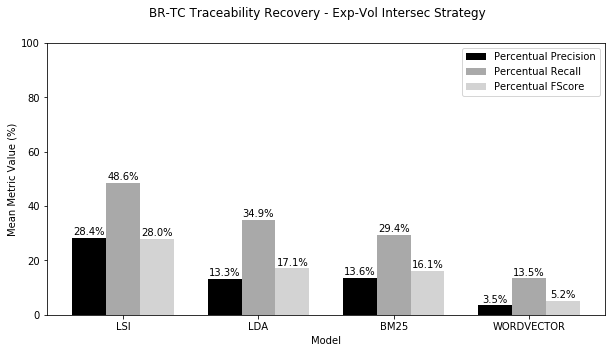

In [3]:
evaluator_2.plot_evaluations_3(evals_df_2, title='BR-TC Traceability Recovery - Exp-Vol Intersec Strategy')

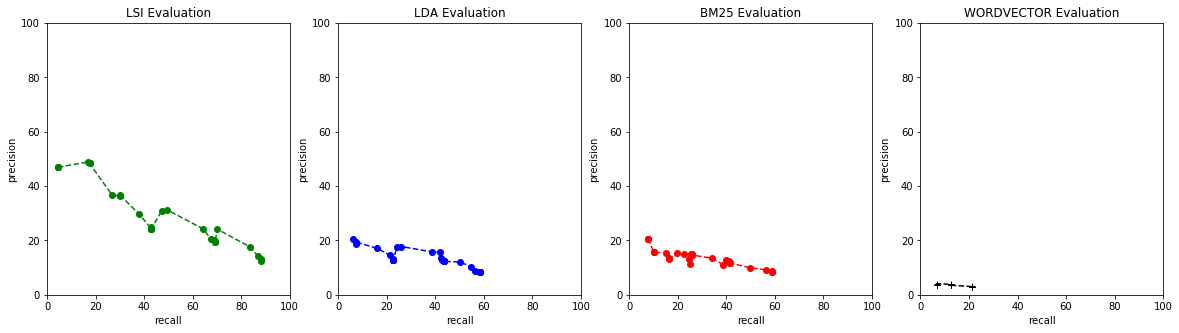

In [4]:
evaluator_2.plot_evaluations_4(evals_df_2)

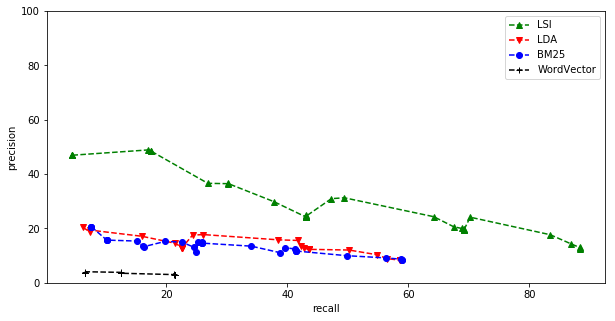

In [5]:
evaluator_2.plot_evaluations_5(evals_df_2)

### Delete Variables

## Volunteers Only Strategy

In [2]:
vol_strat_runner = tc_br_strat_runner.TC_BR_Vol_Strat_Runner()
vol_strat_runner.execute()

evaluator_4 = vol_strat_runner.get_evaluator() 
evals_df_4 = vol_strat_runner.get_evals_df()

OracleVolunteers.shape: (195, 91)
TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [3]:
evals_df_4.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,eval_df,sim_threshold,top,trace_links_df
0,lsi,top_10_cosine_0.0,33.08,23.46,26.09,precision recall fscore ...,0.0,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
1,lsi,top_10_cosine_0.1,33.08,23.46,26.09,precision recall fscore ...,0.1,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
2,lsi,top_10_cosine_0.2,33.08,23.46,26.09,precision recall fscore ...,0.2,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
3,lsi,top_10_cosine_0.3,33.08,23.46,26.09,precision recall fscore ...,0.3,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
4,lsi,top_10_cosine_0.4,32.99,23.28,25.97,precision recall fscore ...,0.4,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...


In [4]:
aux_functions.highlight_df(evals_df_4[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

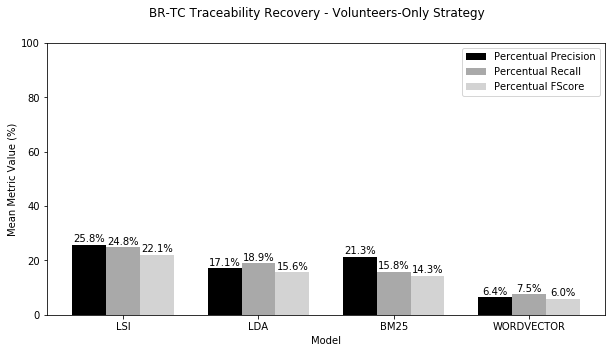

In [5]:
evaluator_4.plot_evaluations_3(evals_df_4, title='BR-TC Traceability Recovery - Volunteers-Only Strategy')

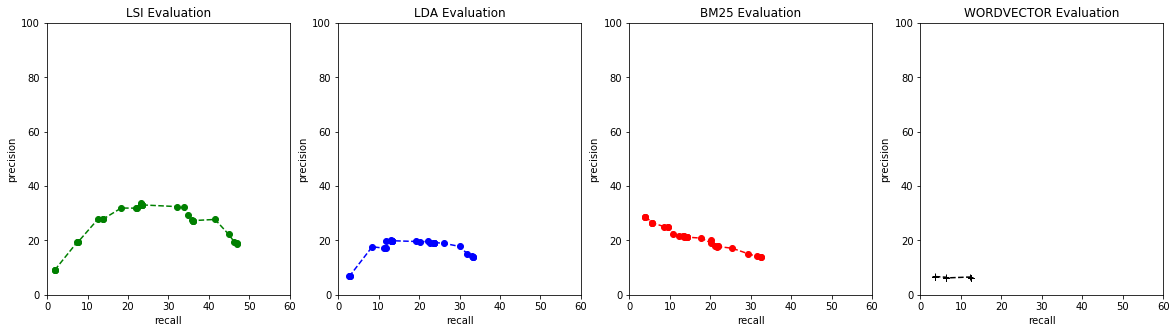

In [6]:
evaluator_4.plot_evaluations_4(evals_df_4)

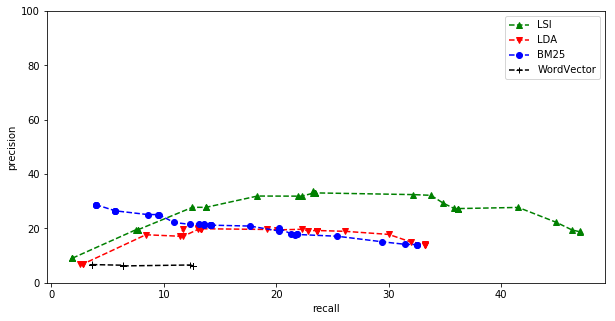

In [7]:
evaluator_4.plot_evaluations_5(evals_df_4)

### Delete Variables

## Union Strategy

In [ ]:
exp_vol_union_strat_runner = tc_br_strat_runner.TC_BR_Exp_Vol_Union_Strat_Runner()
exp_vol_union_strat_runner.execute()

evaluator_1 = exp_vol_union_strat_runner.get_evaluator() 
evals_df_1 = exp_vol_union_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_1.head()

### Plots

In [ ]:
evaluator_1.plot_evaluations_3(evals_df_1, title='BR-TC Traceability Recovery - Exp-Vol Union Strategy')

In [ ]:
evaluator_1.plot_evaluations_4(evals_df_1)

In [ ]:
evaluator_1.plot_evaluations_5(evals_df_1)

### Delete Variables

## Expert Only Strategy

In [ ]:
exp_strat_runner = tc_br_strat_runner.TC_BR_Exp_Strat_Runner()
exp_strat_runner.execute()

evaluator_3 = exp_strat_runner.get_evaluator() 
evals_df_3 = exp_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_3.head()

### Plots

In [ ]:
evaluator_3.plot_evaluations_3(evals_df_3, title='BR-TC Traceability Recovery - Expert-Only Strategy')

In [ ]:
evaluator_3.plot_evaluations_4(evals_df_3)

In [ ]:
evaluator_3.plot_evaluations_5(evals_df_3)

### Delete Variables